## Сонарные данные

### Определение камня или мины

Сонар (ультразвуковой локатор) - это техника использования звука для навигации, коммуникации с объектами и определения объектов на воде или под водой, например морских судов.


Данный набор данных содержит ответные метрики для 60 различных частот сонара, отправленных на известные объекты - мины и камни. Для каждого отправленного и полученного сигнала были записаны данные об объекте, на который направлялся сонар (мина или камень). 


Наша цель - создать модель машинного обучения, которая может определить тип объекта - мина или камень - на основе ответа от сонаров на 60 различных частотах.


Источник данных: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\Machine Learning Python\\DATA\\sonar.all-data.csv')
df.head(10)

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


## Исследование данных

<Axes: >

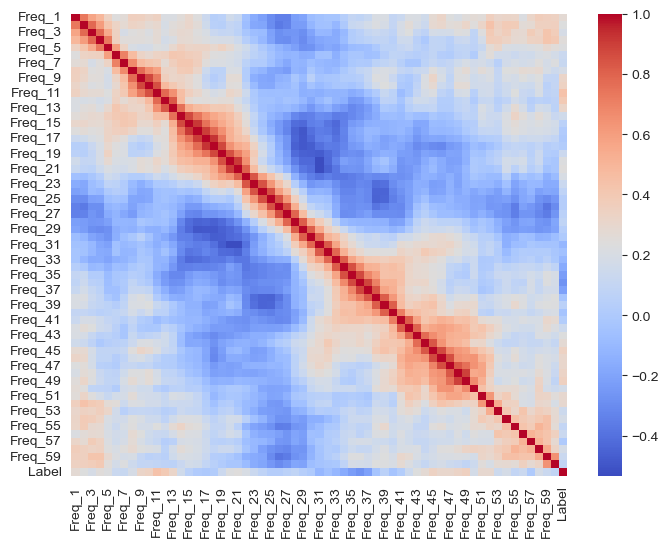

In [11]:
df['Label'] = df['Label'].map({'R':0,'M':1})
plt.figure(figsize=(8,6))
sns.heatmap(new_df.corr(),cmap='coolwarm')

In [15]:
np.abs(df.corr()['Label']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, dtype: float64

Разбиение на обучающий и тестовый наборы данных

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('Label',axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)



Создание объекта PipeLine, в котором будет StandardScaler и модель KNN

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler', scaler), ('knn', knn)]

pipe = Pipeline(operations)



С помощью пайплайна выполним поиск по сетке для различных значений k, и выведим наилучшие параметры

In [33]:
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,30))

param_grid = {'knn__n_neighbors': k_values}
full_cv_classificator = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

full_cv_classificator.fit(X_train, y_train)
full_cv_classificator.best_params_

{'knn__n_neighbors': 2}

In [34]:
full_cv_classificator.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform'}

<Axes: >

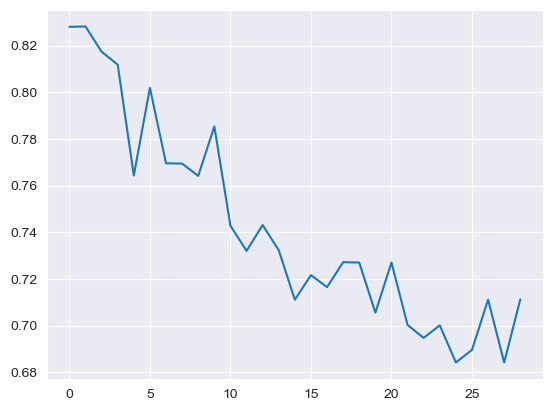

In [35]:
pd.DataFrame(full_cv_classificator.cv_results_)['mean_test_score'].plot()


Финальная оценка модели

In [36]:
y_pred = full_cv_classificator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12  0]
 [ 1  8]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.89      0.94         9

    accuracy                           0.95        21
   macro avg       0.96      0.94      0.95        21
weighted avg       0.96      0.95      0.95        21

